Figure 1. Toy problem set of points.


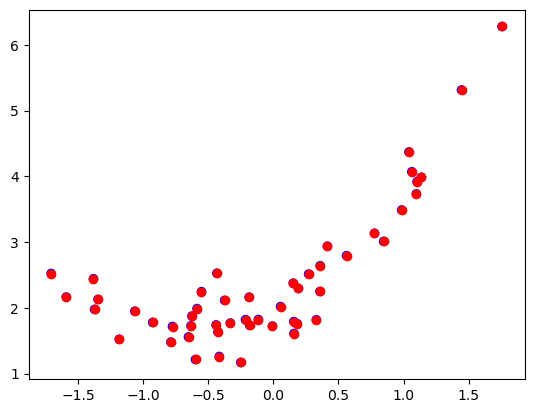

In [6]:
# Toy problem set of points
# After https://medium.com/towards-data-science/visualizing-gradient-descent-parameters-in-torch-332a63d1e5c5 
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20240215)

n = 50
x = np.array(np.random.randn(n), dtype=np.float32)
y = np.array(0.75 * x**2 + 1.0 * x + 2.0 + 0.3 * np.random.randn(n), dtype=np.float32)

plt.scatter(x, y, facecolors='none', edgecolors='b')
plt.scatter(x, y, c='r')
print('Figure 1. Toy problem set of points.')
plt.show()


In [7]:
# ===

import torch

model = torch.nn.Linear(1, 1)
model.weight.data.fill_(6.0)
model.bias.data.fill_(-3.0)

loss_fn = torch.nn.MSELoss()
learning_rate = 0.1
epochs = 100
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  inputs = torch.from_numpy(x).requires_grad_().reshape(-1, 1)
  labels = torch.from_numpy(y).reshape(-1, 1)

  optimizer.zero_grad()
  outputs = model(inputs)
  loss = loss_fn(outputs, labels)
  loss.backward()
  optimizer.step()
  print('epoch {}, loss {}'.format(epoch, loss.item()))



epoch 0, loss 53.078269958496094
epoch 1, loss 34.7295036315918
epoch 2, loss 22.891206741333008
epoch 3, loss 15.226042747497559
epoch 4, loss 10.242652893066406
epoch 5, loss 6.987758159637451
epoch 6, loss 4.8507561683654785
epoch 7, loss 3.4395813941955566
epoch 8, loss 2.5017752647399902
epoch 9, loss 1.8742434978485107
epoch 10, loss 1.451224684715271
epoch 11, loss 1.163843035697937
epoch 12, loss 0.9670254588127136
epoch 13, loss 0.8311155438423157
epoch 14, loss 0.7364832162857056
epoch 15, loss 0.6700497269630432
epoch 16, loss 0.6230385303497314
epoch 17, loss 0.5895166993141174
epoch 18, loss 0.5654408931732178
epoch 19, loss 0.5480331182479858
epoch 20, loss 0.5353691577911377
epoch 21, loss 0.5261048674583435
epoch 22, loss 0.5192938446998596
epoch 23, loss 0.5142641663551331
epoch 24, loss 0.5105355978012085
epoch 25, loss 0.5077620148658752
epoch 26, loss 0.5056928396224976
epoch 27, loss 0.5041452646255493
epoch 28, loss 0.5029852390289307
epoch 29, loss 0.502114236354

Figure 2. L2-learned linear boundary on toy problem.


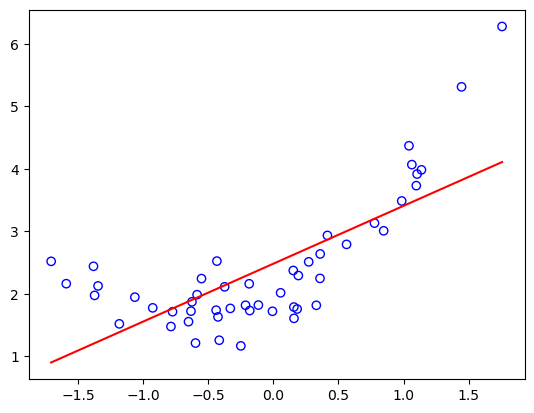

In [8]:

weight = model.weight.item()
bias = model.bias.item()
plt.scatter(x, y, facecolors='none', edgecolors='b')
plt.plot(
  [x.min(), x.max()],
  [weight * x.min() + bias, weight * x.max() + bias],
  c='r')
print('Figure 2. L2-learned linear boundary on toy problem.')
plt.show()



Figure 3. L2 loss function on toy problem.


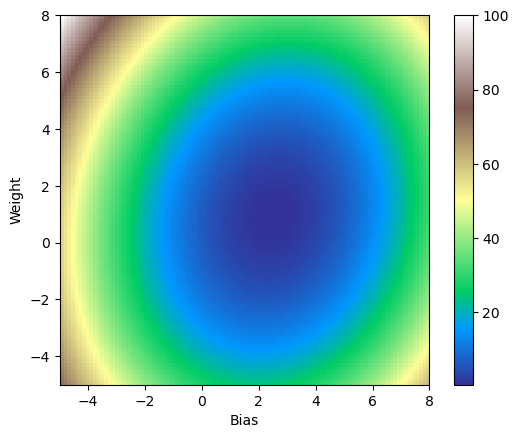

In [9]:

# ===

def get_loss_map(loss_fn, x, y):
  """Maps the loss function on a 100-by-100 grid between (-5, -5) and (13, 13)."""
  losses = [[0.0] * 101 for _ in range(101)]
  x = torch.from_numpy(x)
  y = torch.from_numpy(y)
  for iw in range(101):
    for ib in range(101):
      w = -5.0 + 13.0 * iw / 100.0
      b = -5.0 + 13.0 * ib / 100.0

      ywb = x * w + b
      losses[iw][ib] = loss_fn(ywb, y).item()

  return list(reversed(losses))

loss_fn = torch.nn.MSELoss()
losses = get_loss_map(loss_fn, x, y)

import pylab

cm = pylab.get_cmap('terrain')
fig, ax = plt.subplots()
plt.xlabel('Bias')
plt.ylabel('Weight')
i = ax.imshow(losses, cmap=cm, interpolation='nearest', extent=[-5, 8, -5, 8])
fig.colorbar(i)
print('Figure 3. L2 loss function on toy problem.')
plt.show()


epoch 0, loss 53.078269958496094
epoch 1, loss 34.7295036315918
epoch 2, loss 22.891206741333008
epoch 3, loss 15.226042747497559
epoch 4, loss 10.242652893066406
epoch 5, loss 6.987758159637451
epoch 6, loss 4.8507561683654785
epoch 7, loss 3.4395813941955566
epoch 8, loss 2.5017752647399902
epoch 9, loss 1.8742434978485107
epoch 10, loss 1.451224684715271
epoch 11, loss 1.163843035697937
epoch 12, loss 0.9670254588127136
epoch 13, loss 0.8311155438423157
epoch 14, loss 0.7364832162857056
epoch 15, loss 0.6700497269630432
epoch 16, loss 0.6230385303497314
epoch 17, loss 0.5895166993141174
epoch 18, loss 0.5654408931732178
epoch 19, loss 0.5480331182479858
epoch 20, loss 0.5353691577911377
epoch 21, loss 0.5261048674583435
epoch 22, loss 0.5192938446998596
epoch 23, loss 0.5142641663551331
epoch 24, loss 0.5105355978012085
epoch 25, loss 0.5077620148658752
epoch 26, loss 0.5056928396224976
epoch 27, loss 0.5041452646255493
epoch 28, loss 0.5029852390289307
epoch 29, loss 0.502114236354

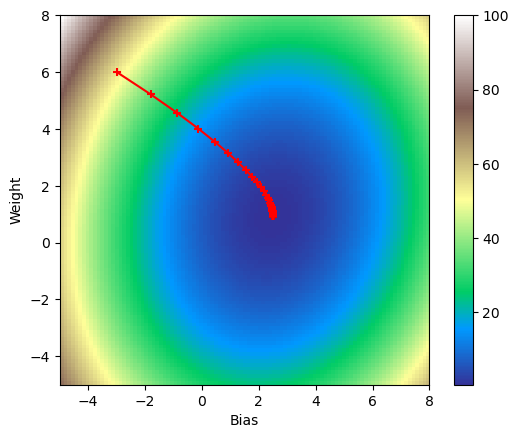

In [11]:


# ===

model = torch.nn.Linear(1, 1)
model.weight.data.fill_(6.0)
model.bias.data.fill_(-3.0)

loss_fn = torch.nn.MSELoss()
learning_rate = 0.1
epochs = 100
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0 * 0.9)

models = [[model.weight.item(), model.bias.item()]]
for epoch in range(epochs):
  inputs = torch.from_numpy(x).requires_grad_().reshape(-1, 1)
  labels = torch.from_numpy(y).reshape(-1, 1)

  optimizer.zero_grad()
  outputs = model(inputs)
  loss = loss_fn(outputs, labels)
  loss.backward()
  optimizer.step()
  print('epoch {}, loss {}'.format(epoch, loss.item()))
  models.append([model.weight.item(), model.bias.item()])


cm = pylab.get_cmap('terrain')
fig, ax = plt.subplots()
plt.xlabel('Bias')
plt.ylabel('Weight')
i = ax.imshow(losses, cmap=cm, interpolation='nearest', extent=[-5, 8, -5, 8])
model_weights, model_biases = zip(*models)
ax.scatter(model_biases, model_weights, c='r', marker='+')
ax.plot(model_biases, model_weights, c='r')
fig.colorbar(i)
print('Figure 4. Visualized gradient descent down loss function.')
plt.show()


Figure 5. Visualized gradient descent down all loss functions.


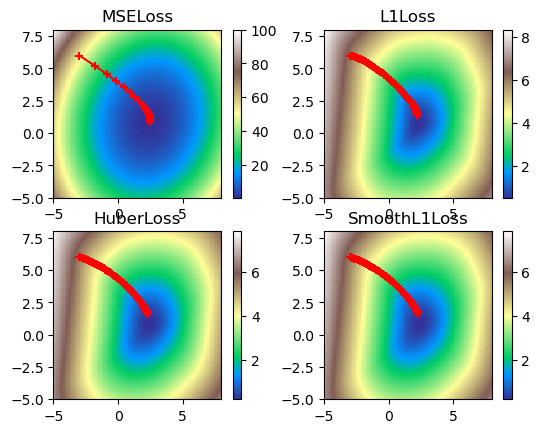

Figure 6. Visualized gradient descent down all loss functions with high momentum.


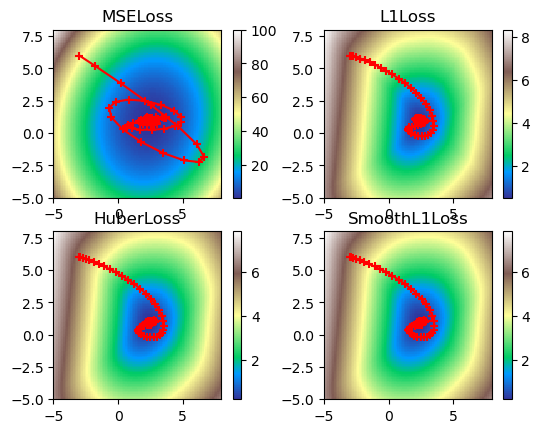

Figure 8. Visualized gradient descent down all loss functions with high Nesterov momentum.


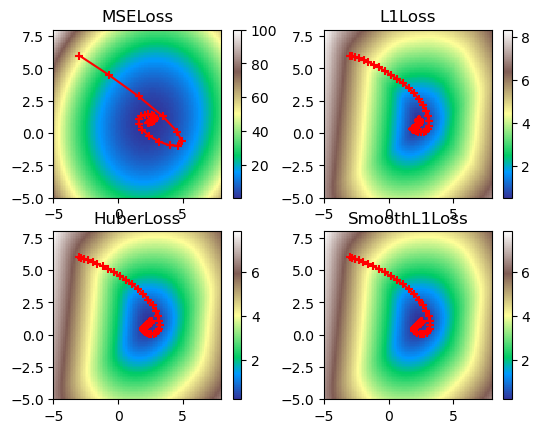

Figure 9. Visualized gradient descent down all loss functions with high Nesterov momentum and weight decay.


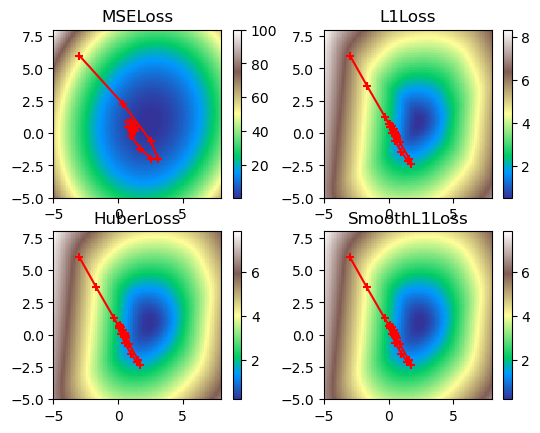

Figure 10. Visualized gradient descent down all loss functions with high momentum and high dampening.


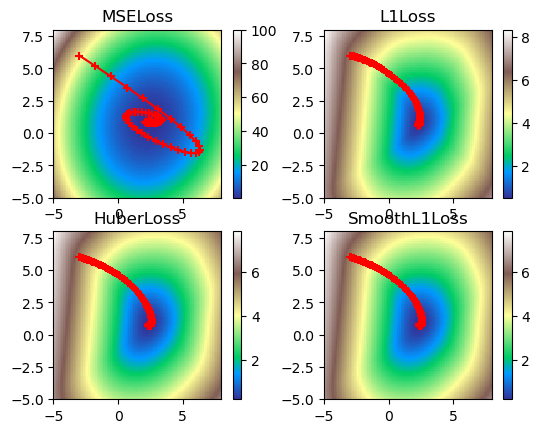

In [12]:


# ===

def learn(criterion, x, y, lr=0.1, epochs=100, momentum=0, weight_decay=0, dampening=0, nesterov=False):
  model = torch.nn.Linear(1, 1)
  model.weight.data.fill_(6.0)
  model.bias.data.fill_(-3.0)
  models = [[model.weight.item(), model.bias.item()]]

  optimizer = torch.optim.SGD(
    model.parameters(),
    lr=lr,
    momentum=momentum,
    weight_decay=weight_decay,
    dampening=dampening,
    nesterov=nesterov)
  for epoch in range(epochs):
    inputs = torch.from_numpy(x).requires_grad_().reshape(-1, 1)
    labels = torch.from_numpy(y).reshape(-1, 1)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print('epoch {}, loss {}'.format(epoch, loss.item()))
    models.append([model.weight.item(), model.bias.item()])

  return model, models


def multi_plot(lr=0.1, epochs=100, momentum=0, weight_decay=0, dampening=0, nesterov=False):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  for loss_fn, title, ax in [
    (torch.nn.MSELoss(), 'MSELoss', ax1),
    (torch.nn.L1Loss(), 'L1Loss', ax2),
    (torch.nn.HuberLoss(), 'HuberLoss', ax3),
    (torch.nn.SmoothL1Loss(), 'SmoothL1Loss', ax4),
  ]:
    losses = get_loss_map(loss_fn, x, y)
    model, models = learn(
      loss_fn, x, y, lr=lr, epochs=epochs, momentum=momentum,
      weight_decay=weight_decay, dampening=dampening, nesterov=nesterov)

    cm = pylab.get_cmap('terrain')
    i = ax.imshow(losses, cmap=cm, interpolation='nearest', extent=[-5, 8, -5, 8])
    ax.title.set_text(title)
    loss_w, loss_b = zip(*models)
    ax.scatter(loss_b, loss_w, c='r', marker='+')
    ax.plot(loss_b, loss_w, c='r')
    fig.colorbar(i)

  plt.show()

print('Figure 5. Visualized gradient descent down all loss functions.')
multi_plot(lr=0.1, epochs=100)

print('Figure 6. Visualized gradient descent down all loss functions with high momentum.')
multi_plot(lr=0.1, epochs=100, momentum=0.9)

# N.B. Figure 7 not generated by Python.

print('Figure 8. Visualized gradient descent down all loss functions with high Nesterov momentum.')
multi_plot(lr=0.1, epochs=100, momentum=0.9, nesterov=True)

print('Figure 9. Visualized gradient descent down all loss functions with high Nesterov momentum and weight decay.')
multi_plot(lr=0.1, epochs=100, momentum=0.9, nesterov=True, weight_decay=2.0)

print('Figure 10. Visualized gradient descent down all loss functions with high momentum and high dampening.')
multi_plot(lr=0.1, epochs=100, momentum=0.9, dampening=0.8)